# Titanic:Machine Learning From Disaster 

## Analysing Titanic Dataset with PyTorch

### Importing the Libriaries

In [1]:
import torch #Pytorch Module
from torch.autograd import Variable #Varible object to efine variables in pytorch
import os #Os module to work with files
from torch.utils.data import Dataset, DataLoader #to define custom datasets and DataLoaders
import torch.nn as nn #Pytorch neural network Module
import torch.nn.functional as F #Pytorch neurl network functions module
import numpy as np #Numpy module for Numerical processing
import pandas as pd #Pandas Module for Data Analysis
from sklearn.model_selection import train_test_split # to split the data into train and validation sets
from sklearn.metrics import f1_score, accuracy_score # To analyse the model performance
from typing import Dict, Tuple, Sequence, List, Union, Any, Callable, Collection # To provide type hints 
from pandas.api.types import is_numeric_dtype, is_categorical_dtype # To check whether Numeric data type or not

### Reading The Data

In [2]:
DATASET_PATH = '../DATASETS/titanic/'
os.listdir(DATASET_PATH)

['gender_submission.csv',
 'pyspark_rf_submission',
 'pyspark_rf_submission.csv',
 'PyTorchTitanicModel.pt',
 'PyTorchTitanicSubmission.csv',
 'test.csv',
 'test_preprocessed.csv',
 'train.csv',
 'train_preprocessed.csv']

In [3]:
#here we are using the preprocessed files
train = pd.read_csv(DATASET_PATH + "train_preprocessed.csv")
test = pd.read_csv(DATASET_PATH + "test_preprocessed.csv")
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,SurName,FamilySize,FamilyGroup,Deck,ChildOrNot,MotherOrNot,label
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,UNK,C,Mr,Hassan,1,single,UNK,Child,NotAMother,0.0
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S,Mrs,Carter,4,small,B,Adult,Mother,1.0
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,UNK,S,Mr,Carbines,1,single,UNK,Adult,NotAMother,0.0
875,876,1,3,"""Najib, Miss. Adele Kiamie """"Jane""""""",female,15.0,0,0,2667,7.2250,UNK,C,Miss,"""Najib",1,single,UNK,Child,NotAMother,1.0
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,UNK,S,Mrs,Renouf,4,small,UNK,Adult,NotAMother,1.0
156,157,1,3,"""Gilnagh, Miss. Katherine """"Katie""""""",female,16.0,0,0,35851,7.7333,UNK,Q,Miss,"""Gilnagh",1,single,UNK,Child,NotAMother,1.0
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Mr,Barkworth,1,single,A,Adult,NotAMother,1.0
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,Miss,Eustis,2,small,D,Adult,NotAMother,1.0
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,UNK,S,Mr,van Billiard,3,small,UNK,Adult,NotAMother,0.0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,UNK,S,Rare,Carter,2,small,UNK,Adult,NotAMother,0.0


In [4]:
test.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,SurName,FamilySize,FamilyGroup,Deck,ChildOrNot,MotherOrNot
95,987,NaN,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,UNK,S,Mr,Tenglin,1,single,UNK,Adult,NotAMother
187,1079,NaN,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.0500,UNK,S,Mr,Davies,3,small,UNK,Child,NotAMother
206,1098,NaN,3,"McGowan, Miss. Katherine",female,35.0,0,0,9232,7.7500,UNK,Q,Miss,McGowan,1,single,UNK,Adult,NotAMother
401,1293,NaN,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,UNK,S,Mr,Gale,2,small,UNK,Adult,NotAMother
92,984,NaN,1,"Davidson, Mrs. Thornton (Orian Hays)",female,27.0,1,2,F.C. 12750,52.0000,B71,S,Mrs,Davidson,4,small,B,Adult,Mother
297,1189,NaN,3,"Samaan, Mr. Hanna",male,-1.0,2,0,2662,21.6792,UNK,C,Mr,Samaan,3,small,UNK,Adult,NotAMother
386,1278,NaN,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,UNK,S,Mr,Aronsson,1,single,UNK,Adult,NotAMother
179,1071,NaN,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C,Mrs,Compton,3,small,E,Adult,Mother
324,1216,NaN,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,UNK,S,Miss,Kreuchen,1,single,UNK,Adult,NotAMother
228,1120,NaN,3,"Everett, Mr. Thomas James",male,40.5,0,0,C.A. 6212,15.1000,UNK,S,Mr,Everett,1,single,UNK,Adult,NotAMother


In [5]:
categ_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 
              'SurName', 'FamilyGroup', 'Deck', 'ChildOrNot', 'MotherOrNot']
continuous_cols = ['Age', 'Fare']
target = 'Survived'

In [6]:
class Preprocessor() : 
    def __init__(self, data:pd.DataFrame, categoricals:List[str] = None, continuous:List[str] = None, 
                 test:bool = False, fill_strategy:str = "MEDIAN", fill_val:int = 0, 
                 preprocesses:List[str] = ['categorify', 'fillmissing', 'normalize', 'encode'],
                 fill_categ_strategy:str = None, fill_categ_val = None) : 
        self.data = data
        self.categoricals = categoricals
        self.continuous = continuous
        self.preprocesses = preprocesses
        self.test = test
        self.fill_strategy = fill_strategy
        self.fill_val = fill_val
        self.fill_categ_strategy = fill_categ_strategy
        self.fill_categ_val = fill_categ_val
       
    def getVocab(self, name:str) : 
        return self.vocab[name]
                    
    def getRevVocab(self, name:str) : 
        return self.rev_vocab[name]
    
    def getEmbSizes(self) : 
        self.emb_sizes = {}
        for name in self.categoricals : 
            self.emb_sizes[name] = min(600, round(1.6 * self.vocab_sizes[name]**0.56))
        return self.emb_sizes
        
    def getVocabSizes(self) : 
        self.vocab_sizes = {}
        for name in self.categoricals : 
            self.vocab_sizes[name] = len(self.categories[name].to_numpy())
        return self.vocab_sizes
            
    def encode(self, test:bool = False) : 
        if test : 
            for name in self.categoricals : 
                if name in self.vocab : 
                    self.data[name] = self.data[name].replace(self.vocab[name])
            return self.data
        else : 
            self.vocab = {}
            self.rev_vocab = {}
            for name in self.categoricals : 
                if name in self.categories : 
                    vocab = self.categories[name].to_numpy()
                    self.vocab[name] = {value : key for key,value in enumerate(vocab)}
                    self.rev_vocab[name] = {key : value for key,value in enumerate(vocab)}
                    self.data[name] = self.data[name].replace(self.vocab[name])
            return self.data
    
    def categorify(self, test:bool = False) : 
        #Inspired from FastAI
        #print("Applying Categorify on ", self.categoricals)
        if test :
            for categ in self.categoricals : 
                if is_numeric_dtype(self.data[categ]) or is_categorical_dtype(self.data[categ]) : 
                    self.data[categ] = pd.Categorical(self.data[categ], categories = self.categories[categ], ordered = True)
                else : 
                    self.data[categ] = pd.Categorical(self.data[categ].str.lower(), 
                                                      categories = self.categories[categ], ordered = True)
            
            return self.data
        else : 
            self.categories = {}
            for categ in self.categoricals : 
                if is_numeric_dtype(self.data[categ]) or is_categorical_dtype(self.data[categ]) : 
                    self.data.loc[:, categ] = self.data.loc[:, categ].astype('category').cat.as_ordered()
                    self.categories[categ] = self.data[categ].cat.categories
                else : 
                    self.data.loc[:, categ] = self.data.loc[:, categ].str.lower().astype('category').cat.as_ordered()
                    self.categories[categ] = self.data[categ].cat.categories
                
            return self.data
                
    def fillMissing(self, continuous:bool = True, categorical:bool = True, test:bool = False) : 
        #To fill missing Values
        #print("Applying FillMissing on ", self.categoricals, self.continuous)
        if continuous : 
            self.fillMissingContinuous(test) 
        if categorical : 
            self.fillMissingCategorical(test)
        return self.data
    
    def fillMissingCategorical(self, test:bool = False) : 
        #Inspired from FastAI
        if test : 
            
            # Fills Missing Values in Categorical variable of Test data
            for name in self.categoricals : 
                if name in self.na_dict:
                    #print(name, self.na_dict[name])
                    self.data[name] = self.data[name].fillna(self.na_dict[name])
                elif pd.isnull(self.data[name]).sum() != 0:
                    raise Exception(f"""There are nan values in field {name} but there were none in the training set. 
                    Please fix those manually.""")
                    
            return self.data
            
        else : 
            #Fills Missing Values in Categorical Variables of Train data
            self.na_dict = {}
            for name in self.categoricals : 
                if pd.isnull(self.data[name]).sum():
                    if self.fill_categ_strategy == "CONSTANT": filler = self.fill_categ_val
                    else: filler = self.data[name].dropna().value_counts().idxmax()
                    self.data[name] = self.data[name].fillna(filler)
                    self.na_dict[name] = filler
                        
                else : 
                    if self.fill_categ_strategy == "CONSTANT": filler = self.fill_categ_val
                    else: filler = self.data[name].dropna().value_counts().idxmax()
                    self.na_dict[name] = filler
                    
            return self.data
    
    
    def fillMissingContinuous(self, test:bool = False) : 
        #Inspired from FastAI
        if test : 
            # Fills Missing Values in Continuous variable of Test data
            for name in self.continuous : 
                if name in self.na_dict:
                    self.data[name] = self.data[name].fillna(self.na_dict[name])
                assert pd.isnull(self.data[name]).sum() == 0, (f"""There are nan values in field {name} but 
                there were none in the training set. Please fix those manually.""")
                    
            return self.data
            
        else : 
            #Fills Missing Values in Continuous Variables of Train data
            self.na_dict = {}
            for name in self.continuous : 
                if pd.isnull(self.data[name]).sum():
                    if self.fill_strategy == "MEDIAN": filler = self.data[name].median()
                    elif self.fill_strategy == "CONSTANT": filler = self.fill_val
                    else: filler = self.data[name].dropna().value_counts().idxmax()
                    self.data[name] = self.data[name].fillna(filler)
                    self.na_dict[name] = filler
                    
                else : 
                    if self.fill_strategy == "MEDIAN": filler = self.data[name].median()
                    elif self.fill_strategy == "CONSTANT": filler = self.fill_val
                    else: filler = self.data[name].dropna().value_counts().idxmax()
                    self.na_dict[name] = filler
            return self.data
    
    
    def normalize(self, test:bool = False) : 
        #Inspired from FastAI
        #print("Applying Normalize on ", self.continuous)
        if test : 
            #Normalizes the Continuous Variables in Test data 
            for n in self.continuous:
                self.data[n] = (self.data[n]-self.means[n]) / (1e-7 + self.stds[n])
                
            return self.data
        
        else : 
            self.means = {}
            self.stds = {}
            #Normalizes the Continuous Variables in Train data
            for n in self.continuous:
                assert is_numeric_dtype(self.data[n]), (f"""Cannot normalize '{n}' column as it isn't numerical.
                    Are you sure it doesn't belong in the categorical set of columns?""")
                self.means[n],self.stds[n] = self.data[n].mean(),self.data[n].std()
                self.data[n] = (self.data[n]-self.means[n]) / (1e-7 + self.stds[n])
                
            return self.data
    
    def preprocess(self, test = False) : 
        if test : 
            self.data = self.data
            for process in self.preprocesses : 
                assert process.lower() in ['normalize', 'fillmissing', 'categorify', 'encode'], (f"""The required 
                preprocess {process} is not defined""")
                process = process.lower()
                if process == 'normalize' : 
                    self.normalize(self.test)
                elif process == 'fillmissing' : 
                    self.fillMissing(test = self.test)
                elif process == 'categorify' : 
                    self.categorify(test = self.test)
                elif process == 'encode' : 
                    self.encode(test = self.test)
            
            return self.data
                    
        else : 
            for process in self.preprocesses : 
                assert process.lower() in ['normalize', 'fillmissing', 'categorify', 'encode'], (f"""The required 
                preprocess {process} is not defined""")
                process = process.lower()
                if process == 'normalize' : 
                    self.normalize(self.test)
                elif process == 'fillmissing' : 
                    self.fillMissing(test = self.test)
                elif process == 'categorify' : 
                    self.categorify(test = self.test)
                elif process == 'encode' : 
                    self.encode(test = self.test)
                else : 
                    pass
                
            return self.data
            
    

In [7]:
class TitanicDataSet(Dataset) : 
    def __init__(self, data:pd.DataFrame, categoricals:List[str] = None, continuous:List[str] = None, 
                 target:str = None, test:bool = False, batch_size = 32) : 
        
        super(TitanicDataSet, self).__init__()
        self.data = data
        self.categoricals = categoricals
        self.continuous = continuous
        self.target = target
        self.test = test
        self.batch_size = batch_size
        if self.test : 
            self.train_columns = self.categoricals + self.continuous
        else : 
            self.train_columns = self.categoricals + self.continuous + [self.target]
    
    def shuffle(self) : 
        self.data = self.data.sample(frac=1).reset_index(drop=True)
        
    def __len__(self) -> int: 
        return len(self.data)//self.batch_size
    
    def show_batch(self, batch_size = 10) : 
        print(repr(self.data.loc[:batch_size, self.train_columns]))
        
    
    def __getitem__(self, idx:int) -> np.ndarray: 
        return (
            torch.as_tensor(self.data.loc[idx, self.continuous].values.astype(float)), 
            torch.as_tensor(self.data.loc[idx, self.categoricals].values.astype(int)),
            torch.as_tensor(self.data.loc[idx, self.target].astype(int)), 
               )
    def get_batch(self, idx) : 
        return (
            [torch.as_tensor(self.data.loc[idx*self.batch_size:(idx+1)*self.batch_size - 1, 
                                          self.continuous].values.astype(float)), 
            torch.as_tensor(self.data.loc[idx*self.batch_size:(idx+1)*self.batch_size - 1, 
                                          self.categoricals].values.astype(int))],
            torch.as_tensor(self.data.loc[idx*self.batch_size:(idx+1)*self.batch_size - 1, 
                                          self.target].values.astype(int)), 
               )
        

In [8]:
preprocessor = Preprocessor(train, categ_cols, continuous_cols)
preprocessor.preprocess()
train = preprocessor.data

In [9]:
train, val = train_test_split(train, test_size = 0.2, shuffle = True, stratify = train[target])
train = train.reset_index(drop = True)
val = val.reset_index(drop = True)

In [10]:
train_dataset = TitanicDataSet(train, categ_cols, continuous_cols, target)
val_dataset = TitanicDataSet(val, categ_cols, continuous_cols, target)

In [11]:
train_dataset.show_batch()

    Pclass  Sex  SibSp  Parch  Embarked  Title  SurName  FamilyGroup  Deck  \
0        1    1      0      0         2      2      490            1     8   
1        2    1      1      2         2      0      195            2     8   
2        0    1      3      2         2      2      234            0     2   
3        2    1      0      0         1      2      150            1     8   
4        1    0      1      1         2      1      524            2     8   
5        2    1      0      0         2      2      437            1     8   
6        1    1      0      0         2      2      589            1     8   
7        0    1      0      0         2      4      127            1     1   
8        0    1      0      0         2      2      495            1     8   
9        0    1      0      0         0      2      408            1     2   
10       2    1      1      0         2      2      278            2     8   

    ChildOrNot  MotherOrNot       Age      Fare  Survived  
0  

In [12]:
vocab_sizes = preprocessor.getVocabSizes()
emb_sizes = preprocessor.getEmbSizes()
vocab_sizes, emb_sizes

({'Pclass': 3,
  'Sex': 2,
  'SibSp': 7,
  'Parch': 7,
  'Embarked': 3,
  'Title': 5,
  'SurName': 687,
  'FamilyGroup': 3,
  'Deck': 9,
  'ChildOrNot': 2,
  'MotherOrNot': 2},
 {'Pclass': 3,
  'Sex': 2,
  'SibSp': 5,
  'Parch': 5,
  'Embarked': 3,
  'Title': 4,
  'SurName': 62,
  'FamilyGroup': 3,
  'Deck': 5,
  'ChildOrNot': 2,
  'MotherOrNot': 2})

In [13]:
preprocessor.data = test
preprocessor.preprocess(test = True)
test_dataset = TitanicDataSet(test, categ_cols, continuous_cols, target, test = True)

In [14]:
class TabularNet(nn.Module) : 
    def __init__(self, classes:int, vocab_sizes:Dict[str, int], emb_sizes:Dict[str, int], 
                 conts:int, cats:int) : 
        super(TabularNet, self).__init__()
        self.classes = classes
        self.vocab_sizes = vocab_sizes
        self.emb_sizes = emb_sizes
        self.conts = conts
        self.cats = cats
        self.n_emb = sum(emb_sizes.values())
        self.linear = nn.Linear(len(self.conts), self.n_emb)
        self.emb_layers = [nn.Embedding(self.vocab_sizes[name] + 1, self.emb_sizes[name]) for name in self.cats]
        self.emb_hid = nn.Linear(len(self.cats), self.n_emb)
        self.batch_norm = nn.BatchNorm1d(self.n_emb)
        self.fc1 = nn.Linear(self.n_emb + self.n_emb, self.n_emb*2)
        self.fc2 = nn.Linear(self.n_emb*2, self.n_emb*2)
        self.fc3 = nn.Linear(self.n_emb*2, self.n_emb)
        self.out = nn.Linear(self.n_emb, self.classes)
        
    def forward(self, inputs) : 
        cont_vars, cat_vars = inputs[0].float(), inputs[1].long()
        inp = self.batch_norm(F.relu(self.linear(cont_vars)))
        embs = []
        for i in range(cat_vars.shape[1]) : 
            emb_layer = self.emb_layers[i]
            embs.append(emb_layer(cat_vars[:, i]))
        emb = self.batch_norm(torch.cat(embs, 1))
        out = torch.stack([inp, emb], 1).view([inp.shape[0], 2*inp.shape[1]])
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = F.softmax(self.out(out), dim = 1)
        
        return out
 

In [15]:
model = TabularNet(2, vocab_sizes, emb_sizes, continuous_cols, categ_cols)

In [16]:
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr = 3e-4)

In [17]:
def accuracy(inp, out) : 
    inp = inp.data
    out = out.argmax(1).data
    acc = (inp == out)
    acc = (sum(acc).true_divide(len(inp))).item()
    return acc

In [18]:
def evaluate(dataset:Callable, model : Callable, opt : Callable, loss_func : Callable) -> Dict[int, Collection[int]] : 
    stats = {}
    loss = []
    acc = []
    for batch_id in range(len(dataset)) : 
        data = dataset.get_batch(batch_id)
        out = model(data[0])
        loss.append(loss_func(out, data[1].long()).item())
        acc.append(accuracy(data[1], out))
    stats['loss'] = loss
    stats['acc'] = acc
    return stats
        

In [19]:
def get_predictions(dataset:Callable, model:Callable) : 
    preds = []
    for batch_id in range(len(dataset)) : 
        data = dataset.get_batch(batch_id)
        out = model(data[0])
        out = out.argmax(1).data
        out = [x.item() for x in out]
        preds.extend(out)
    data = dataset.get_batch(batch_id + 1)
    out = model(data[0])
    out = out.argmax(1).data
    out = [x.item() for x in out]
    preds.extend(out)
    return preds

In [20]:
def train_model(train_dataset : Callable, val_dataset : Callable, model : nn.Module, epochs : int, opt : Callable, 
          loss_func : Callable) -> Dict[int, Collection[int]]: 
    history = {}
    history['train_loss'] = []
    history['train_acc'] = []
    history['val_loss'] = []
    history['val_acc'] = []
    for epoch in range(epochs) : 
        model.train()
        for batch_id in range(len(train_dataset)) : 
            data = train_dataset.get_batch(batch_id)
            out = model(data[0])
            loss = loss_func(out, data[1].long())
            loss.backward()
            opt.step()
        
        data = train_dataset.get_batch(batch_id + 1)
        out = model(data[0])
        loss = loss_func(out, data[1].long())
        loss.backward()
        opt.step()
            
        train_dataset.shuffle()    
        model.eval()
        train_stats = evaluate(train_dataset, model, opt, loss_func)
        val_stats = evaluate(val_dataset, model, opt, loss_func)
        
        print(f"""
        Epoch : {epoch} 
        Train Loss : {sum(train_stats['loss'])/len(train_dataset)}\tTrain Acc : {sum(train_stats['acc'])/len(train_dataset)}
        Val Loss : {sum(val_stats['loss'])/len(val_dataset)}\tVal Acc : {sum(val_stats['acc'])/len(val_dataset)}
        """)
        
        history['train_loss'].append(sum(train_stats['loss'])/len(train_dataset))
        history['train_acc'].append(sum(train_stats['acc'])/len(train_dataset))
        history['val_loss'].append(sum(val_stats['loss'])/len(val_dataset))
        history['val_acc'].append(sum(val_stats['acc'])/len(val_dataset)) 
        
    return history

In [21]:
train_history = train_model(train_dataset, val_dataset, model, 10, opt, loss_func)


        Epoch : 0 
        Train Loss : 0.6202025603164326	Train Acc : 0.6377840909090909
        Val Loss : 0.6272557616233826	Val Acc : 0.61875
        

        Epoch : 1 
        Train Loss : 0.5516053885221481	Train Acc : 0.7528409090909091
        Val Loss : 0.5612268924713135	Val Acc : 0.75625
        

        Epoch : 2 
        Train Loss : 0.5062113878401843	Train Acc : 0.7997159090909091
        Val Loss : 0.5307535409927369	Val Acc : 0.76875
        

        Epoch : 3 
        Train Loss : 0.5242938318035819	Train Acc : 0.7784090909090909
        Val Loss : 0.5250733673572541	Val Acc : 0.78125
        

        Epoch : 4 
        Train Loss : 0.5336627933112058	Train Acc : 0.7727272727272727
        Val Loss : 0.5223549962043762	Val Acc : 0.7875
        

        Epoch : 5 
        Train Loss : 0.4891506501219489	Train Acc : 0.8196022727272727
        Val Loss : 0.5311556875705719	Val Acc : 0.78125
        

        Epoch : 6 
        Train Loss : 0.4817837408997796	Train

In [22]:
train_stats = pd.DataFrame(train_history)

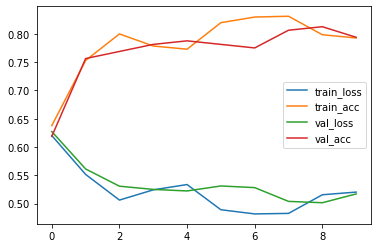

In [23]:
train_stats.plot()

In [24]:
torch.save({'model_state_dict': model.state_dict(), 'optimizer_state_dict': opt.state_dict()}, 
           DATASET_PATH + "PyTorchTitanicModel.pt")

In [25]:
#checkpoint = torch.load(DATASET_PATH + "PyTorchTitanicModel.pt")
#model.load_state_dict(checkpoint['model_state_dict'])

In [26]:
test_preds = get_predictions(test_dataset, model)

In [27]:
assert len(test_preds) == len(test), print(f"""
Predictions are not Correct, 
Length of Predictions : {len(test_preds)} and Length Of Test data {len(test)}
""")

In [28]:
test['Survived'] = test_preds
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,SurName,FamilySize,FamilyGroup,Deck,ChildOrNot,MotherOrNot
0,892,0,2,"Kelly, Mr. James",1,0.596156,0,0,330911,-0.496652,UNK,1,2,185,1,1,7,0,1
1,893,1,2,"Wilkes, Mrs. James (Ellen Needs)",0,1.295115,1,0,363272,-0.511498,UNK,2,3,348,2,2,7,0,1
2,894,0,1,"Myles, Mr. Thomas Francis",1,2.133867,0,0,240276,-0.463381,UNK,1,2,242,1,1,7,0,1
3,895,0,2,"Wirz, Mr. Albert",1,0.176780,0,0,315154,-0.481733,UNK,2,2,352,1,1,7,0,1
4,896,1,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,-0.102804,1,1,3101298,-0.416831,UNK,2,3,164,3,2,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,2,"Spector, Mr. Woolf",1,-1.388890,0,0,A.5. 3236,-0.492699,UNK,2,2,310,1,1,7,0,1
414,1306,1,0,"Oliva y Ocana, Dona. Fermina",0,0.847781,0,0,PC 17758,1.312926,C105,0,4,253,1,1,2,0,1
415,1307,0,2,"Saether, Mr. Simon Sivertsen",1,0.819823,0,0,SOTON/O.Q. 3101262,-0.507022,UNK,2,2,295,1,1,7,0,1
416,1308,0,2,"Ware, Mr. Frederick",1,-1.388890,0,0,359309,-0.492699,UNK,2,2,335,1,1,7,0,1


In [29]:
np.unique(test['Survived'], return_counts = True)

(array([0, 1], dtype=int64), array([261, 157], dtype=int64))

In [30]:
test[['PassengerId', 'Survived']].to_csv(DATASET_PATH + "PyTorchTitanicSubmission.csv", index = False)